# **Stroke Prediction Modelling**

## **COMP 3608 - Intelligent Systems Project**

**Group Members:**

Christin Brown - 816030953

Shania Gajadhar - 816030212

Dakota Sharma - 816021022

## **Problem Specification**

Sometimes referred to as a brain attack, a stroke occurs when blood flow to the brain is impeded or when a blood vessel in the brain ruptures. As a result of this, damage or death of certain regions of the brain can take place. Strokes can potentially result in long-lasting brain impairment, sustained disability, or even death.

Strokes are a major health issue worldwide as well as in Trinidad and Tobago. The Centers for Disease Control and Prevention (CDC) has stated that strokes are the 5th leading cause of death in the United States of America. 6.6 million deaths were attributed to strokes in 2020. According to the World Health Organization (WHO), in 2020, strokes accounted for 822 deaths in Trinidad in Tobago, or 9.56% of total deaths for the year. In 2019, strokes were recorded as the third highest leading cause of death in Trinidad and Tobago.

According to the CDC, 80% of strokes are preventable. Being able to anticipate strokes in patients would therefore help treat those who are at risk of suffering them. Early intervention is critical to minimize the potential damage caused by a stroke. Stroke prediction facilitates early intervention by prompting preventive measures.


## **Getting Started**

### **Import Libraries**

We begin by importing the necessary libraries for the project.

In [ ]:
import pandas as pd # Import Pandas for data manipulation
import numpy as np # Import NumPy for numerical operations
import seaborn as sns # Import Seaborn for data visualization
import matplotlib.pyplot as plt # Import Matplotlib for plotting

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

### **Import Dataset**

In [ ]:
# Load the data

data = pd.read_csv('stroke_data.csv')


Saving stroke_data.csv to stroke_data.csv


In [ ]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


We drop the **id** column as it is a unique value that bears no weight on the likelihood of other attributes.

In [ ]:
data = data.drop('id', axis=1)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


On further inspection, it can be observed that **bmi** contains null values.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


There are 201 null records in **bmi**.

In [ ]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

We replace the 201 null **bmi** records with the mean bmi.

In [ ]:
data.bmi.replace(to_replace=np.nan, value=data.bmi.mean(), inplace=True)

The data set now contains no null values.

In [ ]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
data.corr(numeric_only=True)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


Categorical variables will need to be converted to numerical variables.

In [ ]:
#  Using Lable encoding
le = LabelEncoder()
en_data = data.apply(le.fit_transform)
en_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3850,240,1,1
1,0,82,0,0,1,3,0,3588,162,2,1
2,1,101,0,1,1,2,0,2483,199,2,1
3,0,70,0,0,1,2,1,3385,218,3,1
4,0,100,1,0,1,3,0,3394,113,2,1


## **Exploratory Data Analysis (EDA)**

### **Data Visualization**

##### **Stroke Pie Chart**

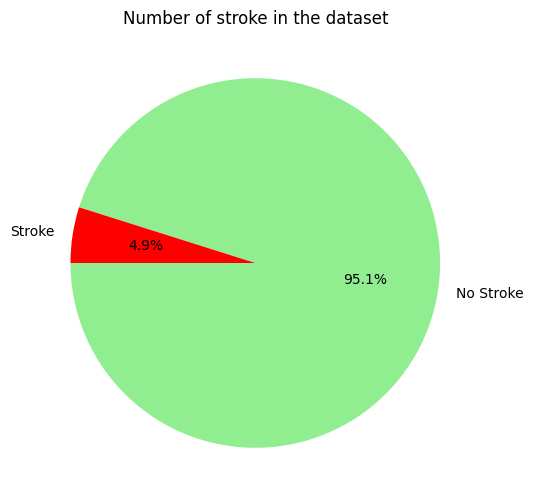

In [ ]:
labels=['No Stroke', 'Stroke']
counts = data['stroke'].value_counts(sort = True)

colors = ["lightgreen","red"]

plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=180,)
plt.title('Number of stroke in the dataset')
plt.show()

**Observation:** The data set appears to be vary unbalanced in terms of the amount of stroke events.

//add observations later

##### **Count Plots**

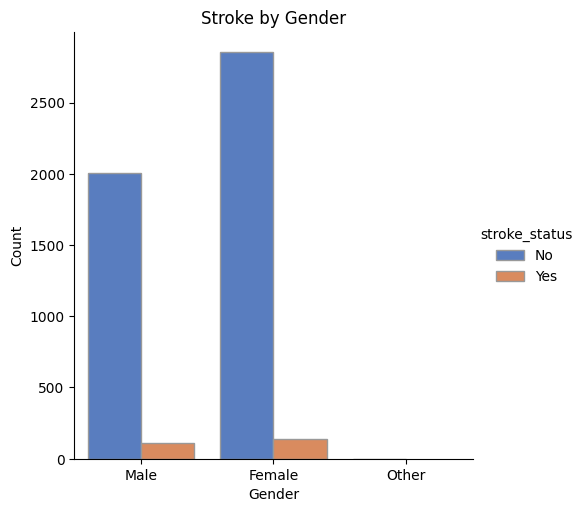

In [ ]:
# Create a new column 'stroke_status' based on the 'stroke' column
data['stroke_status'] = data['stroke'].apply(lambda x: 'No' if x == 0 else 'Yes')

# Create the catplot
sns.catplot(x="gender", hue="stroke_status", hue_order=['No', 'Yes'], kind="count", palette="muted", edgecolor=".6", data=data)

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Stroke by Gender')
plt.show()



**Observations:**
- There are more females than males in the data set.
- There are no records for **Other** in the data set.


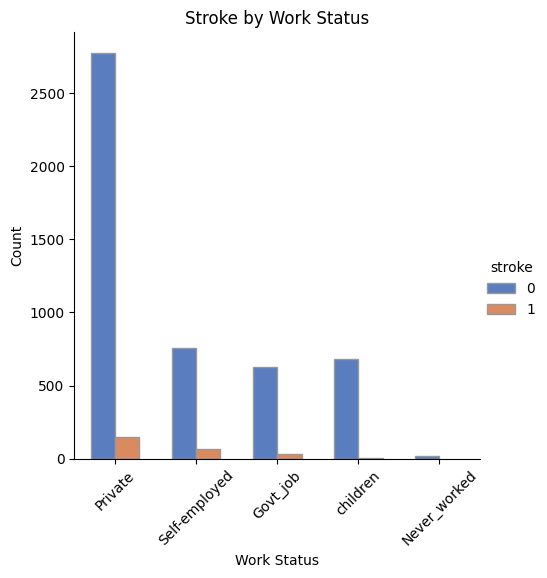

In [ ]:
sns.catplot(x="work_type", hue="stroke", kind="count", palette="muted", edgecolor=".6", data=data, width=0.6)

# Set labels and title
plt.xlabel('Work Status')
plt.ylabel('Count')
plt.title('Stroke by Work Status')
plt.xticks(rotation=45)
plt.show()

**Observations:**
- Strokes are most present in privately employed persons and self-employed persons.
- Governement workers appear to be less likely to have a stroke than private and self-employed persons.
- Children are highly unlikely to have a stroke.

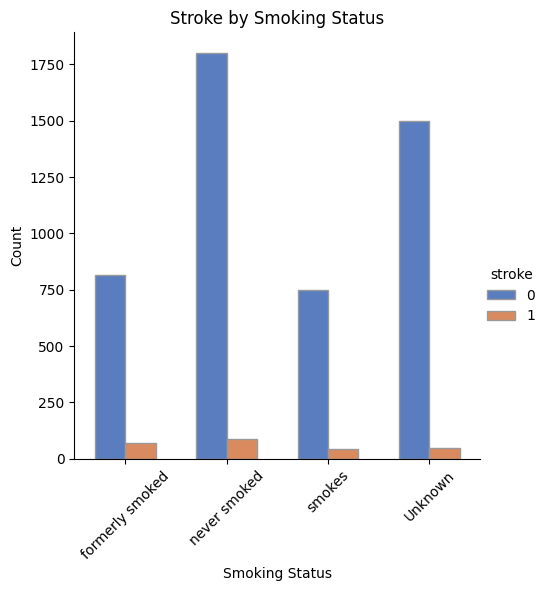

In [ ]:
sns.catplot(x="smoking_status", hue="stroke", kind="count", palette="muted", edgecolor=".6", data=data, width=0.6)

# Set labels and title
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.title('Stroke by Smoking Status')
plt.xticks(rotation=45)
plt.show()

**Observations:**
- There appears to be no correlation between smoking and strokes.
- Stroke levels seem to be consistent across all categories of smoking status.

##### **Categorical Plots**

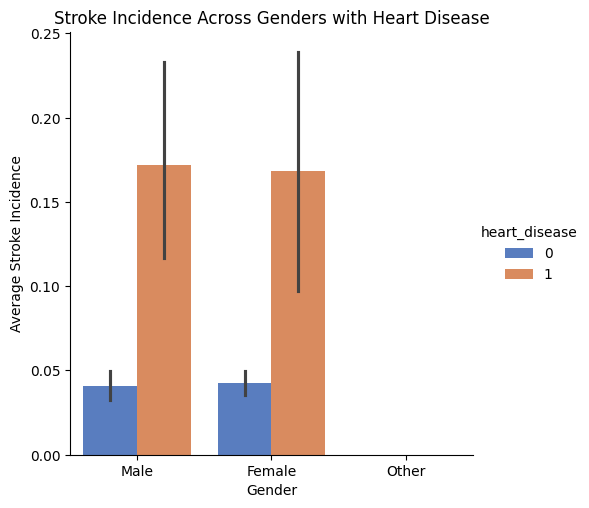

In [ ]:
sns.catplot(x="gender", y="stroke", hue="heart_disease", palette="muted", kind="bar", data=data)

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Average Stroke Incidence')
plt.title('Stroke Incidence Across Genders with Heart Disease')
plt.show()

**Observations:**
- There appears to be a correlation between heart disease and strokes.

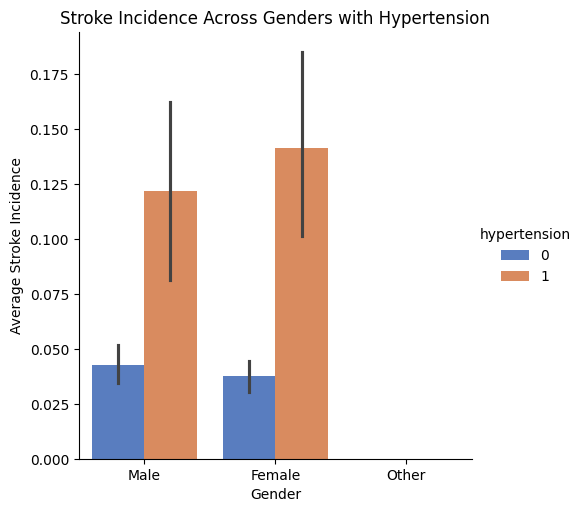

In [ ]:
sns.catplot(x="gender", y="stroke", hue="hypertension", palette="muted", kind="bar", data=data)

# Set labels and title

plt.xlabel('Gender')
plt.ylabel('Average Stroke Incidence')
plt.title('Stroke Incidence Across Genders with Hypertension')
plt.show()

**Observations:**
- There appears to be a correlation between hypertension and strokes.

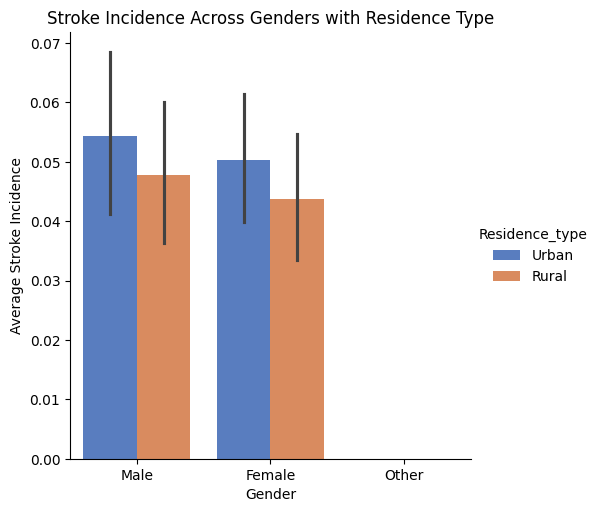

In [ ]:
sns.catplot(x="gender", y="stroke", hue="Residence_type", palette="muted", kind="bar", data=data)

# Set labels and title

plt.xlabel('Gender')
plt.ylabel('Average Stroke Incidence')
plt.title('Stroke Incidence Across Genders with Residence Type')
plt.show()

**Observations:**
- Urban residents appear to be slightly more prone to strokes than rural residents.

##### **Distribution Plots**

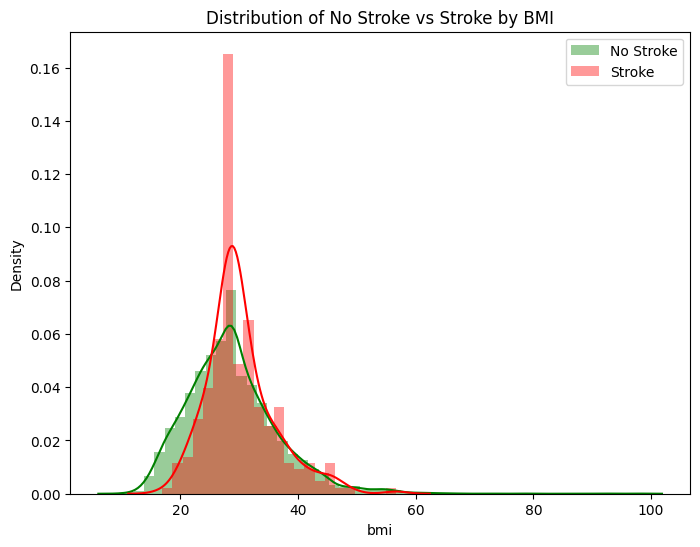

In [ ]:
plt.figure(figsize=(8, 6))
sns.distplot(data[data['stroke'] == 0]["bmi"], color='green', label='No Stroke')
sns.distplot(data[data['stroke'] == 1]["bmi"], color='red', label='Stroke')
plt.title('Distribution of No Stroke vs Stroke by BMI')
plt.legend()
plt.show()

**Observations:**
- There appears to be no clear correlation between **bmi** and **stroke**.

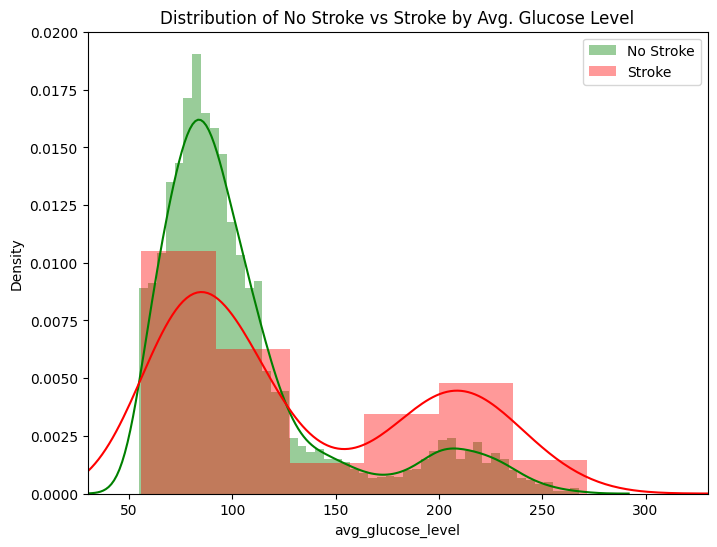

In [ ]:
plt.figure(figsize=(8, 6))
sns.distplot(data[data['stroke'] == 0]["avg_glucose_level"], color='green', label='No Stroke')
sns.distplot(data[data['stroke'] == 1]["avg_glucose_level"], color='red', label = 'Stroke')
plt.title('Distribution of No Stroke vs Stroke by Avg. Glucose Level')
plt.xlim([30,330])
plt.legend()
plt.show()

**Observations:**
- There appears to be no clear correlation between **avg_glucose_level** and **stroke**.

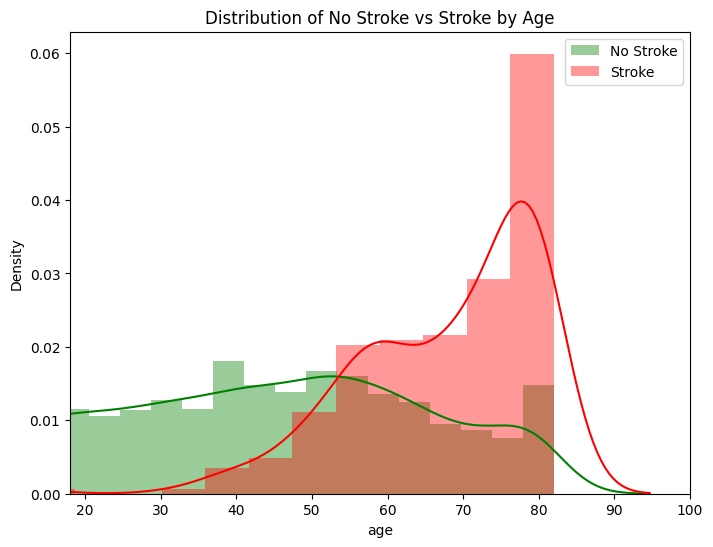

In [ ]:
plt.figure(figsize=(8, 6))
sns.distplot(data[data['stroke'] == 0]["age"], color='green', label = 'No Stroke')
sns.distplot(data[data['stroke'] == 1]["age"], color='red', label = 'Stroke')
plt.title('Distribution of No Stroke vs Stroke by Age')
plt.xlim([18,100])
plt.legend()
plt.show()

**Observations:**
- There seems to be a strong positive correlation with **age** and **stroke**.

##### **Feature Importance**

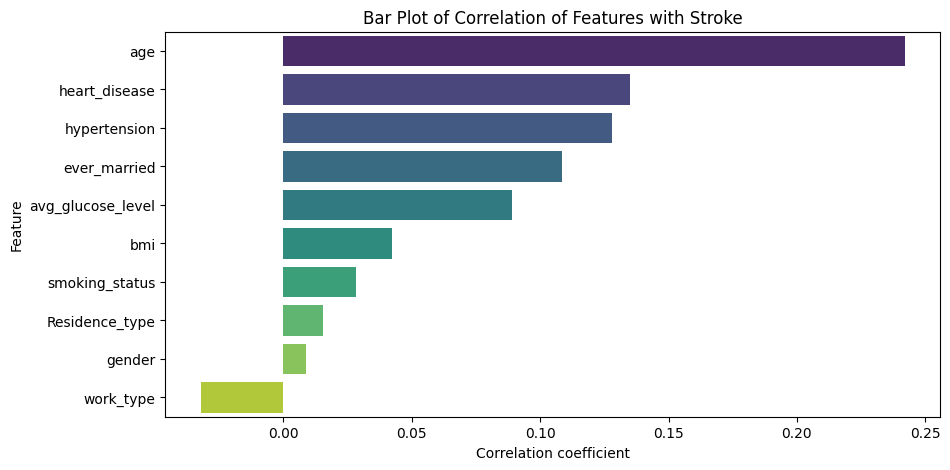

In [ ]:
# Calculate correlation matrix
corr = en_data.corr()

# Get correlations with 'stroke' and sort them
corr_stroke = corr['stroke'].drop('stroke').sort_values(ascending=False)

plt.figure(figsize=(10, len(corr_stroke)/2))
sns.barplot(x=corr_stroke.values, y=corr_stroke.index, palette='viridis')
plt.title('Bar Plot of Correlation of Features with Stroke')
plt.ylabel('Feature')
plt.xlabel('Correlation coefficient')
plt.show()

**Observations:**
- **age** is by far the attribute with the strongest correlation to strokes.
- **heart_disease** and **hypertension** both have a similar level of correlation to strokes.
- **ever_married** and **avg_glucose** have some level of correlation to strokes but it is weaker than the previously mentioned attributes.
- **bmi**, **smoking_status**, **Residence_type**, **gender**, and **work_type** have little to no correlation with strokes.

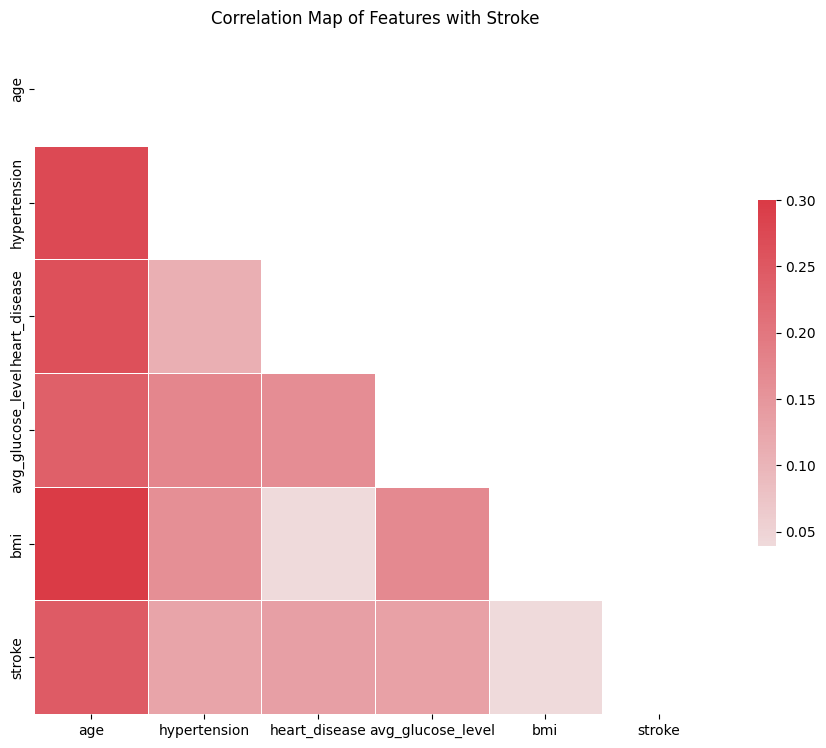

In [ ]:
# Compute the correlation matrix
corr = data.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool)) # Create a mask for the upper triangle
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(200, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Map of Features with Stroke')
plt.show()

**Observations:**
- **age** appears to be the feature with the most importance.

#### Plotting the feature importances.

Feature ranking:
1. age (0.675149)
2. smoking_status (0.107387)
3. work_type (0.071988)
4. heart_disease (0.031303)
5. gender (0.030635)
6. hypertension (0.029951)
7. Residence_type (0.028734)
8. ever_married (0.024854)


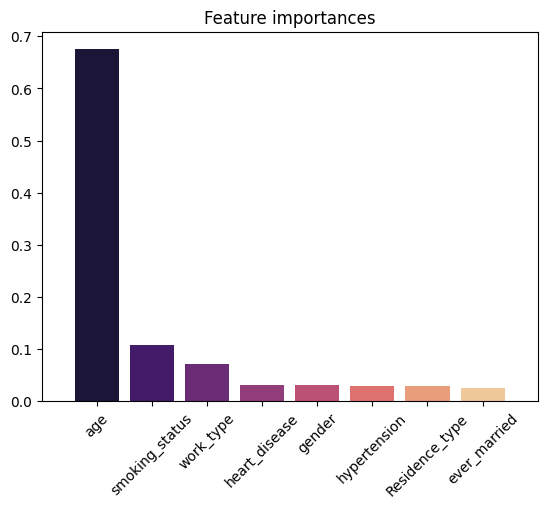

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

features=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type',
       'smoking_status']
X = en_data[features]
y = en_data['stroke']

forest = ExtraTreesClassifier(n_estimators=250, random_state=42)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

plt.figure()
plt.title("Feature importances")
sns.barplot(x=np.array(features)[indices], y=importances[indices], palette="magma")
plt.xticks(range(X.shape[1]), np.array(features)[indices],rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()


**Observations:**
- As suspected previously, **age** is the feature with the most feature importance.

## **Data Preprocessing**

In order to remedy the imbalance of the data set, oversampling will be utilised.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

X , y = en_data[features],en_data["stroke"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

sm = SMOTE()
X_res, y_res = sm.fit_resample(X_train,y_train)

print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

print('After OverSampling, the shape of train_X: {}'.format(X_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res==0)))

Before OverSampling, counts of label '1': 249
Before OverSampling, counts of label '0': 4861 

After OverSampling, the shape of train_X: (7802, 8)
After OverSampling, the shape of train_y: (7802,) 

After OverSampling, counts of label '1': 3901
After OverSampling, counts of label '0': 3901


## **Modelling**

We begin by importing the selected models.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

Furthermore, performance and evaluation metrics will also be imported.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report, auc
from sklearn.model_selection import cross_val_score

A list of the models is created named **models[]**. Then the performance metrics for each model are calculated iteratively using a list called **performance_metrics**, and the results are then placed into **models_list** for each respective model.

In [ ]:
models = []
models.append(['Logistic Regression', LogisticRegression(random_state=42)])
models.append(['Random Forest Classifier', RandomForestClassifier(random_state=42)])
models.append(['Neural Network', MLPClassifier(hidden_layer_sizes=(32, 16), activation='relu', solver='adam', max_iter=5000)])

model_list=[]

for m in range(len(models)):
    performance_metrics = []
    model = models[m][1]
    model.fit(X_res, y_res)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred) #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = X_res, y = y_res, cv = 10) #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
    print('-----------------------------------')
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))
    print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('Precision: {:.2f}'.format(precision))
    print('Recall: {:.2f}'.format(recall))
    print('F1: {:.2f}'.format(f1))
    print('-----------------------------------')
    print('')
    performance_metrics.append(models[m][0])
    performance_metrics.append((accuracy_score(y_test, y_pred))*100)
    performance_metrics.append(accuracies.mean()*100)
    performance_metrics.append(accuracies.std()*100)
    performance_metrics.append(roc)
    performance_metrics.append(precision)
    performance_metrics.append(recall)
    performance_metrics.append(f1)
    model_list.append(performance_metrics)


-----------------------------------
Logistic Regression :
[[722 238]
 [ 21  41]]
Accuracy Score:  0.7465753424657534
K-Fold Validation Mean Accuracy: 78.37 %
Standard Deviation: 2.38 %
ROC AUC Score: 0.71
Precision: 0.15
Recall: 0.66
F1: 0.24
-----------------------------------

-----------------------------------
Random Forest Classifier :
[[858 102]
 [ 53   9]]
Accuracy Score:  0.8483365949119374
K-Fold Validation Mean Accuracy: 91.91 %
Standard Deviation: 1.90 %
ROC AUC Score: 0.52
Precision: 0.08
Recall: 0.15
F1: 0.10
-----------------------------------

-----------------------------------
Neural Network :
[[704 256]
 [ 23  39]]
Accuracy Score:  0.7270058708414873
K-Fold Validation Mean Accuracy: 80.11 %
Standard Deviation: 2.54 %
ROC AUC Score: 0.68
Precision: 0.13
Recall: 0.63
F1: 0.22
-----------------------------------



#### **Table of Metrics**

In [ ]:
df = pd.DataFrame(model_list, columns= ['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std. Deviation', 'ROC AUC', 'Precision', 'Recall', 'F1'])

In [ ]:
df

,Model,Accuracy,K-Fold Mean Accuracy,Std. Deviation,ROC AUC,Precision,Recall,F1
0,Logistic Regression,74.657534,78.365327,2.383424,0.706687,0.146953,0.661290,0.240469
1,Random Forest Classifier,84.833659,91.913014,1.904215,0.519456,0.081081,0.145161,0.104046
2,Neural Network,72.700587,80.108556,2.537820,0.681183,0.132203,0.629032,0.218487


**Accuracy:** The Random Forest Classifier has the highest accuracy score (0.850), followed by Logistic Regression (0.749), and then the Neural Network (0.583).

**ROC AUC Score:** Both Logistic Regression and the Neural Network have similar ROC AUC scores (0.71 and 0.72, respectively), indicating similar discriminatory power in distinguishing between positive and negative classes. The Random Forest Classifier has a lower ROC AUC score (0.54), suggesting poorer performance in this aspect.

**Precision and Recall:** The Neural Network has the highest recall (0.87), indicating its ability to correctly identify a large proportion of positive cases. However, its precision is low (0.11), suggesting a high false positive rate. The Logistic Regression model has a balanced precision and recall compared to the other models.

**F1 Score:** The F1 score balances precision and recall and provides a single metric for model performance. In this case, the F1 scores are similar across models, with Logistic Regression having the highest (0.24).

**Preliminary Conclusion:** Logistic Regression model seems to be the best choice for this task. It demonstrates a relatively balanced performance across various evaluation metrics and has a decent accuracy score and F1 score.

## **Model Tuning**

Hyperparameter tuning using grid search will be used to attempt to determine the best accuracy score and parameters for each model.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[42]}]),
               (RandomForestClassifier(),[{'n_estimators':[100,150,200,500],'criterion':['gini','entropy'],'random_state':[42]}]),
               (MLPClassifier(), [{'activation': ['relu', 'tanh', 'logistic'], 'solver': ['adam', 'sgd', 'lbfgs']}])]

In [43]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(X_res, y_res)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

LogisticRegression():
Best Accuracy : 78.34%
Best Parameters :  {'C': 0.75, 'random_state': 42}

----------------

RandomForestClassifier():
Best Accuracy : 91.76%
Best Parameters :  {'criterion': 'entropy', 'n_estimators': 200, 'random_state': 42}

----------------

MLPClassifier():
Best Accuracy : 81.08%
Best Parameters :  {'activation': 'logistic', 'solver': 'adam'}

----------------



#### **After Tuning Hyperparameters**

              precision    recall  f1-score   support

           0       0.97      0.76      0.85       960
           1       0.15      0.66      0.25        62

    accuracy                           0.75      1022
   macro avg       0.56      0.71      0.55      1022
weighted avg       0.92      0.75      0.82      1022

ROC AUC score: 0.7774865591397849
Accuracy Score:  0.7544031311154599


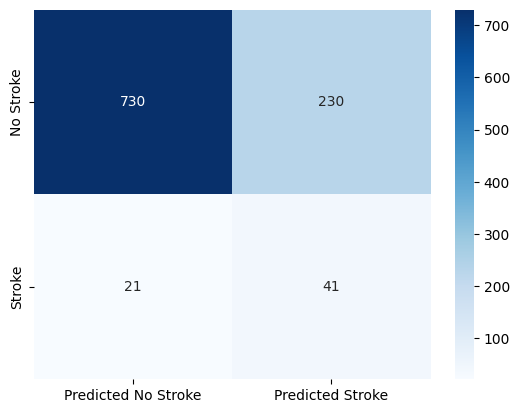

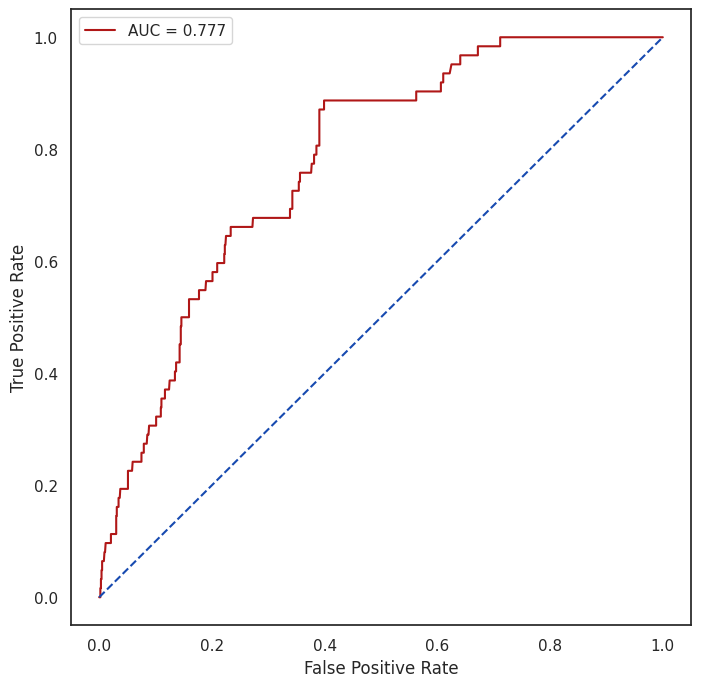

In [44]:
#Fitting Logistic Regression
classification = LogisticRegression(C = 1, random_state=42)
classification.fit(X_res, y_res)
y_pred = classification.predict(X_test)
y_prob = classification.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', yticklabels = ['No Stroke', 'Stroke'],
             xticklabels = ['Predicted No Stroke', 'Predicted Stroke'])

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

**Observations:**
- The confusion matrix remained the same before and after tuning, indicating that the number of true positives, true negatives, false positives, and false negatives did not change.
- The accuracy score remains unchanged at 0.749 before and after tuning, suggesting that the overall correctness of the predictions did not improve after tuning.
- Before tuning, the ROC AUC score was 0.71, which increased to 0.786 after tuning. This suggests that the model's ability to distinguish between positive and negative classes improved slightly after tuning.
- Precision, recall, and F1 score remained the same before and after tuning.

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       960
           1       0.08      0.16      0.11        62

    accuracy                           0.84      1022
   macro avg       0.51      0.52      0.51      1022
weighted avg       0.89      0.84      0.86      1022

ROC AUC score: 0.7167926747311828
Accuracy Score:  0.8405088062622309


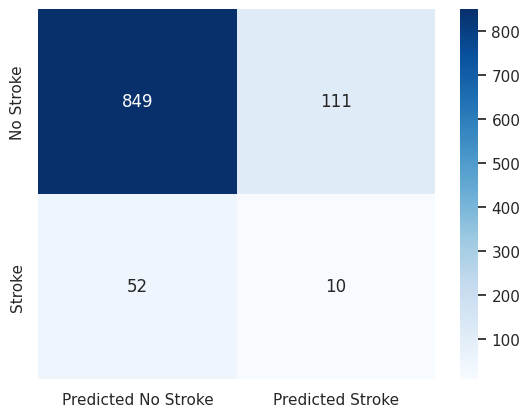

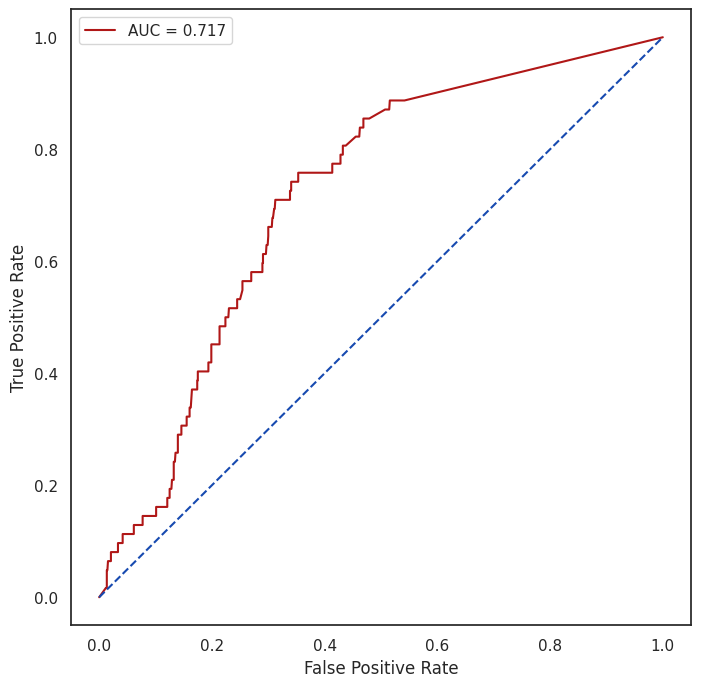

In [45]:
#Fitting Random Forest Classifier
model = RandomForestClassifier(criterion = 'gini', n_estimators = 150, random_state = 42)
model.fit(X_res, y_res)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', yticklabels = ['No Stroke', 'Stroke'],
             xticklabels = ['Predicted No Stroke', 'Predicted Stroke'])

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

**Observations:**
- The accuracy score increased slightly from 0.850 to 0.852 after tuning, suggesting a marginal improvement in the overall correctness of the predictions.
- Before tuning, the ROC AUC score was 0.54, which increased to 0.723 after tuning. This indicates that the model's ability to discriminate between positive and negative classes improved significantly after tuning.
- Precision, recall, and F1 score slightly decreased after tuning.

              precision    recall  f1-score   support

           0       0.96      0.78      0.86       960
           1       0.14      0.53      0.22        62

    accuracy                           0.77      1022
   macro avg       0.55      0.66      0.54      1022
weighted avg       0.91      0.77      0.82      1022

ROC AUC score: 0.7644657258064516
Accuracy Score:  0.7681017612524462


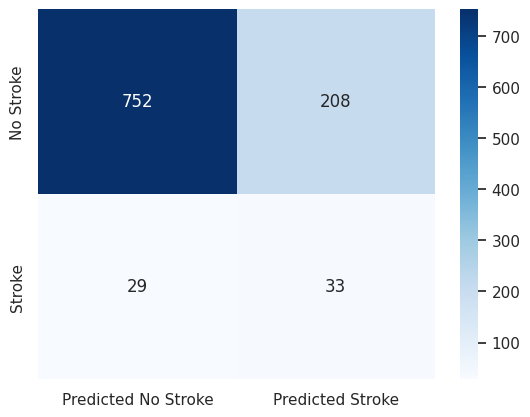

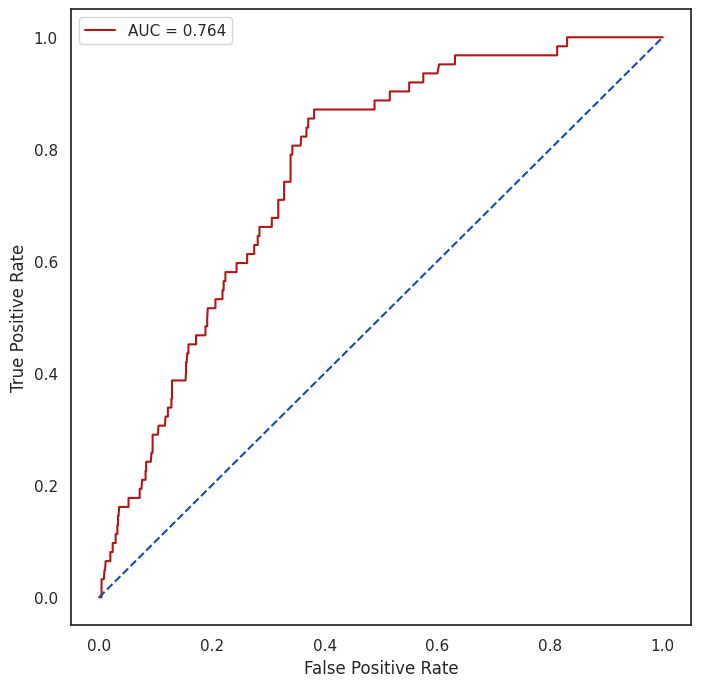

In [46]:
#Fitting Neural Network
model = MLPClassifier(hidden_layer_sizes=(32, 16), activation='tanh', solver='adam', max_iter=5000)
model.fit(X_res, y_res)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', yticklabels = ['No Stroke', 'Stroke'],
             xticklabels = ['Predicted No Stroke', 'Predicted Stroke'])

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

**Observations:**
- The accuracy score improved from 0.583 to 0.718 after tuning, suggesting a notable improvement in the overall correctness of the predictions.
- Before tuning, the ROC AUC score was 0.72, which increased to 0.775 after tuning. This suggests that the model's ability to discriminate between positive and negative classes improved significantly after tuning.
- Precision, recall, and F1 score also improved after tuning.

## **Conclusion**


**Accuracy Score:** Random Forest Classifier achieved the highest accuracy score (0.852), followed by Logistic Regression (0.749), and MLPClassifier (0.718).

**ROC AUC Score:** Logistic Regression achieved the highest ROC AUC score (0.786), indicating its better ability to distinguish between positive and negative classes compared to the other models.

**Precision and Recall:** Logistic Regression achieved the highest precision (0.15) and recall (0.66), indicating its ability to correctly classify positive instances while minimizing false positives.

**F1 Score:** Logistic Regression also achieved the highest F1 score (0.24), indicating a better balance between precision and recall compared to the other models.

Based on these metrics, Logistic Regression seems to be the best-suited model for the problem. It demonstrated the highest ROC AUC score and F1 score among the models, indicating better overall performance in terms of classifying positive instances while controlling false positives.

#### **Implications for Stroke Prediction and Prevention:**
- Accurate prediction models like Logistic Regression can play a crucial role in early identification of individuals at a high risk of stroke.

- Timely interventions and preventive measures based on accurate predictions can potentially reduce the incidence and severity of strokes.

- This would lead to improved patient outcomes, prevent long term disability,  and reduced healthcare costs.

#### **Limitations:**
- One limitation is the reliance on a single dataset, which may not capture the full complexity of stroke risk factors.
- Future research could explore additional datasets to validate the findings and improve model generalization.

#### **Recommendations:**
- Further research into feature engineering and selection techniques could enhance model performance and interpretability.
- Continuous monitoring and refinement of the predictive model with new data can ensure its relevance and effectiveness in medical practice.
